# Validate Model Performance  
## Test data loading.

In [55]:
import numpy as np
import pandas as pd
from datetime import datetime

In [60]:
root = "E:\Dataset\MCM\\2021_ICM_Problem_D_Data"
data_artist = pd.read_csv(root + '\\NormalArtistWithLabel.csv', encoding='utf-8')
data_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5602 entries, 0 to 5601
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_id         5602 non-null   int64  
 1   danceability      5602 non-null   float64
 2   energy            5602 non-null   float64
 3   valence           5602 non-null   float64
 4   tempo             5602 non-null   float64
 5   loudness          5602 non-null   float64
 6   mode              5602 non-null   float64
 7   acousticness      5602 non-null   float64
 8   instrumentalness  5602 non-null   float64
 9   liveness          5602 non-null   float64
 10  speechiness       5602 non-null   float64
 11  is_C              5602 non-null   float64
 12  is_C#/Db          5602 non-null   float64
 13  is_D              5602 non-null   float64
 14  is_D#/Eb          5602 non-null   float64
 15  is_E              5602 non-null   float64
 16  is_F              5602 non-null   float64


In [61]:
X_feature = data_artist.iloc[:, 1:23]
Y_label = data_artist.iloc[:, 23]

In [62]:
X_feature[:5]

,danceability,energy,valence,tempo,loudness,mode,acousticness,instrumentalness,liveness,speechiness,...,is_D,is_D#/Eb,is_E,is_F,is_F#/Gb,is_G,is_G#/Ab,is_A,is_A#/Bb,is_B
0,0.344917,0.236624,0.353346,0.450884,0.623680,0.198288,0.738602,0.021434,0.229359,0.028257,...,0.0,0.0,0.0,0.198288,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.611846,0.448513,0.685619,0.478517,0.688228,0.198288,0.688390,0.023275,0.239903,0.080248,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.198288,0.0
2,0.558345,0.199884,0.494759,0.449351,0.648872,0.198288,0.912147,0.013426,0.214403,0.041968,...,0.0,0.0,0.0,0.198288,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.490243,0.477135,0.550421,0.541808,0.698081,0.198288,0.564826,0.035161,0.309317,0.044218,...,0.0,0.0,0.0,0.000000,0.0,0.198288,0.0,0.0,0.000000,0.0
4,0.503682,0.719720,0.659016,0.528177,0.778923,0.198288,0.294967,0.181025,0.267156,0.030210,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [134]:
col = data_artist.columns[1:23]
col

Index(['danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'is_C',
       'is_C#/Db', 'is_D', 'is_D#/Eb', 'is_E', 'is_F', 'is_F#/Gb', 'is_G',
       'is_G#/Ab', 'is_A', 'is_A#/Bb', 'is_B'],
      dtype='object')

In [63]:
Y_label[:10]

0        Vocal
1      Country
2        Vocal
3     Pop/Rock
4     Pop/Rock
5     Pop/Rock
6     Pop/Rock
7    Classical
8         Jazz
9        Vocal
Name: main_genre, dtype: object

In [64]:
print(Y_label.size)
print(np.unique(Y_label))

5602
['Avant-Garde' 'Blues' "Children's" 'Classical' 'Comedy/Spoken' 'Country'
 'Easy Listening' 'Electronic' 'Folk' 'International' 'Jazz' 'Latin'
 'New Age' 'Pop/Rock' 'R&B;' 'Reggae' 'Religious' 'Stage & Screen'
 'Unknown' 'Vocal']


## Genre encoding

In [65]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()
enc.fit(list(Y_label))
Y_label = enc.transform(list(Y_label))

In [66]:
print(np.unique(Y_label))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Load model

In [67]:
import pickle
from minisom import MiniSom
from sklearn.metrics import classification_report

In [68]:
with open(root + '\\newGaussian2.p', 'rb') as infile:
    som = pickle.load(infile)

In [69]:
X_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5602 entries, 0 to 5601
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5602 non-null   float64
 1   energy            5602 non-null   float64
 2   valence           5602 non-null   float64
 3   tempo             5602 non-null   float64
 4   loudness          5602 non-null   float64
 5   mode              5602 non-null   float64
 6   acousticness      5602 non-null   float64
 7   instrumentalness  5602 non-null   float64
 8   liveness          5602 non-null   float64
 9   speechiness       5602 non-null   float64
 10  is_C              5602 non-null   float64
 11  is_C#/Db          5602 non-null   float64
 12  is_D              5602 non-null   float64
 13  is_D#/Eb          5602 non-null   float64
 14  is_E              5602 non-null   float64
 15  is_F              5602 non-null   float64
 16  is_F#/Gb          5602 non-null   float64


In [70]:
X_feature = np.array(X_feature)
Y_label = np.array(Y_label)

In [71]:
winmap = som.labels_map(X_feature, Y_label)

In [72]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [73]:
Y_pred = classify(som, X_feature)
print(classification_report(Y_label, np.array(Y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.47      0.23      0.31       101
           2       0.50      0.50      0.50         4
           3       0.63      0.61      0.62        28
           4       0.94      0.65      0.77        46
           5       0.48      0.25      0.33       403
           6       0.48      0.43      0.45        23
           7       0.62      0.36      0.46       208
           8       0.52      0.39      0.45        95
           9       0.60      0.15      0.24        81
          10       0.63      0.59      0.61       406
          11       0.47      0.38      0.42       229
          12       0.51      0.53      0.52        38
          13       0.72      0.90      0.80      2807
          14       0.57      0.48      0.52       677
          15       0.57      0.43      0.49       141
          16       0.67      0.18      0.28        89
          17       0.49    

In [74]:
som.quantization_error(X_feature)

0.29458263728777917

## Visualization

In [75]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

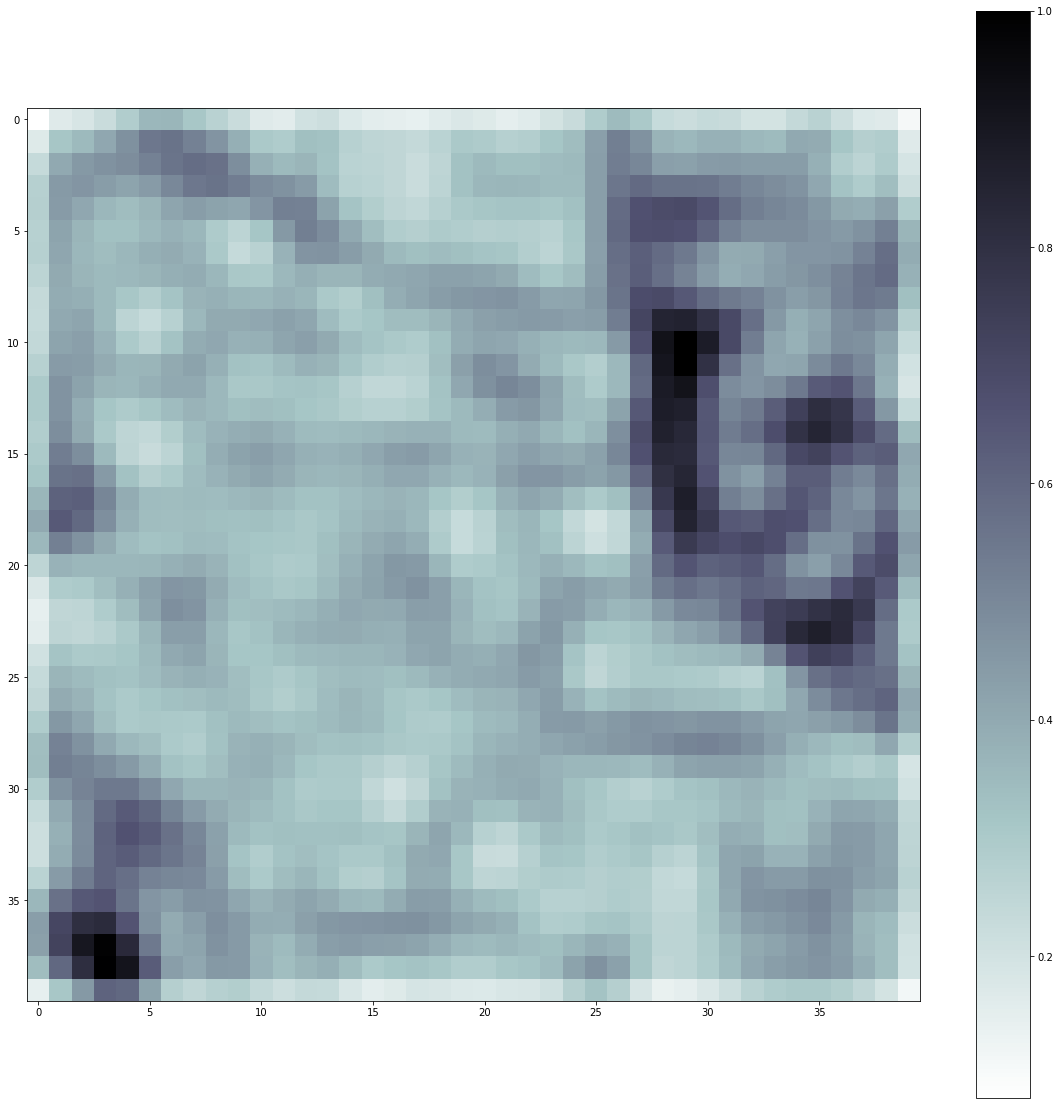

In [76]:
heatmap = som.distance_map()  #生成U-Matrix
plt.figure(figsize=(20, 20))
plt.imshow(heatmap, cmap='bone_r')      #miniSom案例中用的pcolor函数,需要调整坐标
plt.colorbar()

## For more precise ploting

In [77]:
all_label = data_artist.iloc[:, 23]
all_label = np.unique(all_label)
all_label

array(['Avant-Garde', 'Blues', "Children's", 'Classical', 'Comedy/Spoken',
       'Country', 'Easy Listening', 'Electronic', 'Folk', 'International',
       'Jazz', 'Latin', 'New Age', 'Pop/Rock', 'R&B;', 'Reggae',
       'Religious', 'Stage & Screen', 'Unknown', 'Vocal'], dtype=object)

In [78]:
label_list = list(all_label)
number_list = [11, 101, 4, 28, 46, 403, 23, 208, 95, 81, 406, 229, 38, 2807, 677, 141, 89, 50, 3, 162]
for i in range(len(label_list)):
    print(i, label_list[i], number_list[i])

0 Avant-Garde 11
1 Blues 101
2 Children's 4
3 Classical 28
4 Comedy/Spoken 46
5 Country 403
6 Easy Listening 23
7 Electronic 208
8 Folk 95
9 International 81
10 Jazz 406
11 Latin 229
12 New Age 38
13 Pop/Rock 2807
14 R&B; 677
15 Reggae 141
16 Religious 89
17 Stage & Screen 50
18 Unknown 3
19 Vocal 162


In [79]:
markers = ['o', 's', 'D', 'v', '^', 
            '<', '>', '1', '2', '3', 
            '4', '8', 'p', '*', 'h',
            '+', 'x', '|', '_', 'd']
'''
 0    o   圆        11
 1    s   正方形    101
 2    D   钻石      4
 3    v   倒三角形  28
 4    ^   正三角形  46
 5    <   左三角形  403     这个
 6    >   右三角形  23
 7    1   下三叉    208
 8    2   上三叉    95
 9    3   左三叉    81
10    4   右三叉    406     这个好
11    8   八角形    229
12    p   五角形    38
13    *   星星      2807
14    h   六角形    677     这个好
15    +   +     141
16    x   x     89
17    |   v线   50
18    _   H线   3
19    d   钻石  162     这个也好
'''
'''
0   深蓝色
1   黄色
2   绿色
3   红色
4   紫色
5   棕色
6   粉色
7   灰色
8   米黄
9   浅蓝色
'''
colors = ['C0', 'C1', 'C2', 'C3', 'C4',
            'C5', 'C6', 'C7', 'C8', 'C9',
            'C0', 'C1', 'C2', 'C3', 'C4',
            'C5', 'C6', 'C7', 'C8', 'C9']

In [80]:
### Vocal 对 R&B 影响大 先画 1930 年之前的

In [81]:
active_start = np.array(data_artist['active_start'])

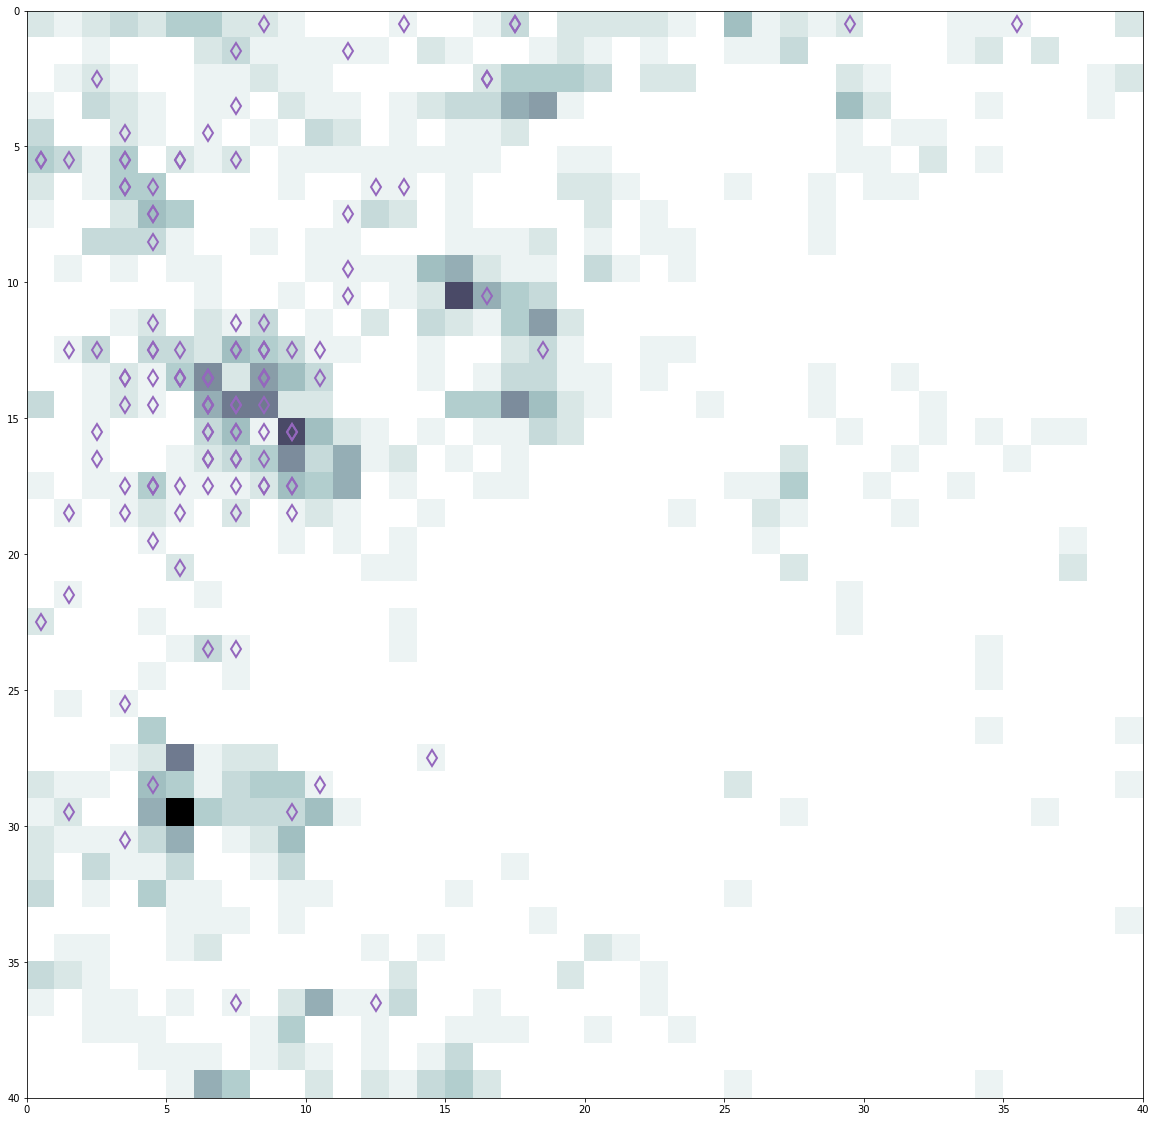

In [124]:
plt.figure(figsize=(20, 20))
base = np.zeros((40, 40, 20), dtype='i')
heatmap = np.zeros((40, 40), dtype='i')


for cnt, xx in enumerate(X_feature):
    if Y_label[cnt] == 19 and active_start[cnt] < 1960:
        w = som.winner(xx)  # getting the winner
    # 在样本Heat的地方画上标记
        plt.plot(w[0]+.5, w[1]+.5, markers[Y_label[cnt]], markerfacecolor='None',
                markeredgecolor=colors[4], markersize=12, markeredgewidth=2)


for k in [0, 1, 2]:
    feature = data_list[k].to_numpy()
    for cnt, xx in enumerate(feature):
        w = som.winner(xx)  # getting the winner   
        heatmap[w[1]][w[0]] += 1 


plt.pcolor(heatmap, cmap='bone_r')  # plotting the distance map as background

plt.axis([0, 40, 0, 40])
ax = plt.gca()
ax.invert_yaxis() #颠倒y轴方向

plt.show()

In [96]:
influence_list = np.zeros((20,1), dtype='i')

for i in np.arange(1, 40):
    for j in np.arange(1, 40):
        for k in range(20):
            influence_list[k] += base[j][i][k] 

for i in range(20):
    print(i, label_list[i], influence_list[i])

0 Avant-Garde [0]
1 Blues [0]
2 Children's [0]
3 Classical [0]
4 Comedy/Spoken [0]
5 Country [0]
6 Easy Listening [0]
7 Electronic [0]
8 Folk [0]
9 International [0]
10 Jazz [0]
11 Latin [0]
12 New Age [0]
13 Pop/Rock [0]
14 R&B; [0]
15 Reggae [0]
16 Religious [0]
17 Stage & Screen [0]
18 Unknown [0]
19 Vocal [0]


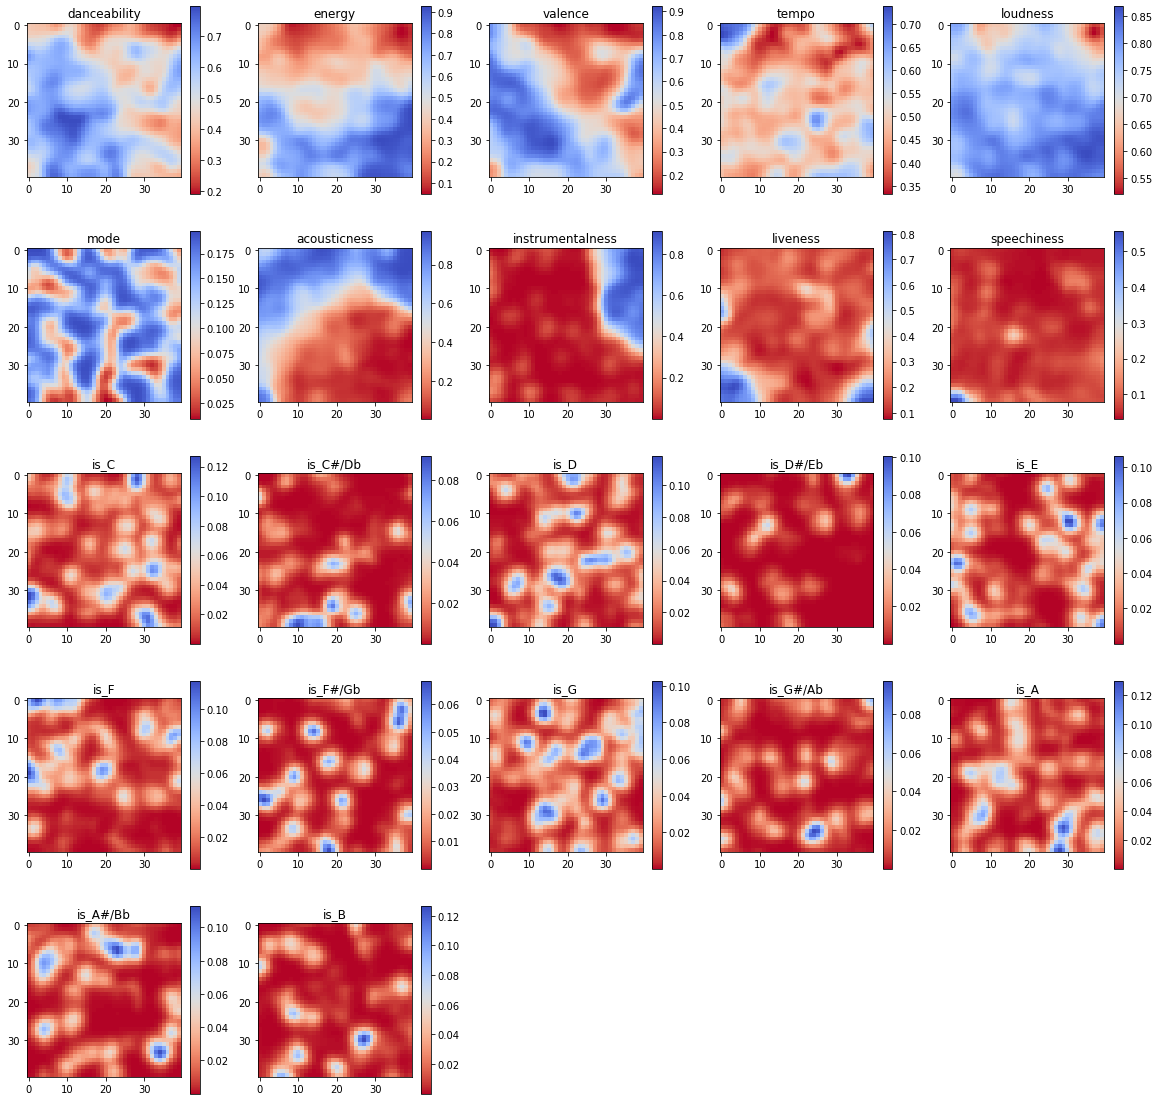

In [137]:
plt.figure(figsize=(20, 20))
W = som.get_weights()
size = 40
for i in range(22):
    plt.subplot(5, 5, i+1)
    plt.title(str(col[i]))
    plt.imshow(W[:,:,i], cmap='coolwarm_r')
    plt.colorbar()
#plt.tight_layout()
plt.show()

## Genre Change Over Time

In [97]:
root = "E:\Dataset\MCM\\2021_ICM_Problem_D_Data"
data = pd.read_csv(root + '\\NormalArtistWithLabel.csv', encoding='utf-8')
data.head(5)

,artist_id,danceability,energy,valence,tempo,loudness,mode,acousticness,instrumentalness,liveness,...,is_E,is_F,is_F#/Gb,is_G,is_G#/Ab,is_A,is_A#/Bb,is_B,main_genre,active_start
0,792507,0.344917,0.236624,0.353346,0.450884,0.623680,0.198288,0.738602,0.021434,0.229359,...,0.0,0.198288,0.0,0.000000,0.0,0.0,0.000000,0.0,Vocal,1930
1,816890,0.611846,0.448513,0.685619,0.478517,0.688228,0.198288,0.688390,0.023275,0.239903,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.198288,0.0,Country,1950
2,79016,0.558345,0.199884,0.494759,0.449351,0.648872,0.198288,0.912147,0.013426,0.214403,...,0.0,0.198288,0.0,0.000000,0.0,0.0,0.000000,0.0,Vocal,1930
3,66915,0.490243,0.477135,0.550421,0.541808,0.698081,0.198288,0.564826,0.035161,0.309317,...,0.0,0.000000,0.0,0.198288,0.0,0.0,0.000000,0.0,Pop/Rock,1960
4,894465,0.503682,0.719720,0.659016,0.528177,0.778923,0.198288,0.294967,0.181025,0.267156,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,Pop/Rock,1960


In [98]:
data = data.drop(['artist_id'], axis=1)

In [99]:
genre = data['main_genre']
for i in range(len(genre)):
    genre[i] = str(genre[i])
data['main_genre'] = genre

In [100]:
data.loc[1]['main_genre'] == 'Country'

True

In [101]:
ind = data['main_genre'] == 'R&B;'
sum(ind)

677

In [102]:
R_and_B = data[ind]
R_and_B = R_and_B.reset_index()
R_and_B = R_and_B.drop(['index'], axis=1)
R_and_B

,danceability,energy,valence,tempo,loudness,mode,acousticness,instrumentalness,liveness,speechiness,...,is_E,is_F,is_F#/Gb,is_G,is_G#/Ab,is_A,is_A#/Bb,is_B,main_genre,active_start
0,0.542845,0.524978,0.617701,0.471518,0.677787,0.198288,0.344589,0.025823,0.178499,0.033617,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,1960
1,0.522794,0.556694,0.653169,0.484845,0.708959,0.000000,0.424943,0.140866,0.227959,0.028577,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,1950
2,0.534354,0.430322,0.573394,0.500689,0.708361,0.198288,0.606796,0.006103,0.257903,0.039662,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,1950
3,0.434621,0.450590,0.603020,0.468294,0.720126,0.198288,0.702104,0.000263,0.283479,0.041615,...,0.000000,0.0,0.0,0.198288,0.000000,0.0,0.0,0.000000,R&B;,1950
4,0.713834,0.692963,0.627572,0.495891,0.793846,0.198288,0.256325,0.047261,0.191975,0.049327,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.198288,R&B;,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.686933,0.540360,0.219661,0.375676,0.807539,0.000000,0.097489,0.000000,0.427918,0.013265,...,0.198288,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,2010
673,0.534936,0.530335,0.311033,0.344993,0.804551,0.198288,0.658634,0.000054,0.102351,0.108900,...,0.000000,0.0,0.0,0.000000,0.198288,0.0,0.0,0.000000,R&B;,2010
674,0.871824,0.533343,0.599853,0.404407,0.814240,0.198288,0.047389,0.000000,0.247972,0.049957,...,0.198288,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,2010
675,0.850272,0.519308,0.742688,0.421341,0.757623,0.198288,0.000794,0.000013,0.056168,0.015404,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,R&B;,2010


In [103]:
year_list = {1930: sum(data['active_start'] == 1930),
            1940: sum(data['active_start'] == 1940),
            1950: sum(data['active_start'] == 1950),
            1960: sum(data['active_start'] == 1960),
            1970: sum(data['active_start'] == 1970),
            1980: sum(data['active_start'] == 1980),
            1990: sum(data['active_start'] == 1990),
            2000: sum(data['active_start'] == 2000),
            2010: sum(data['active_start'] == 2010)}
year_list

{1930: 155,
 1940: 245,
 1950: 540,
 1960: 855,
 1970: 796,
 1980: 951,
 1990: 1128,
 2000: 728,
 2010: 204}

In [111]:
data_list = []
for key in year_list.keys():
    ind = data['active_start'] == key
    df = data[ind]
    df = df.reset_index()
    df = df.drop(['index', 'active_start', 'main_genre'], axis=1)
    data_list.append(df)

data_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      155 non-null    float64
 1   energy            155 non-null    float64
 2   valence           155 non-null    float64
 3   tempo             155 non-null    float64
 4   loudness          155 non-null    float64
 5   mode              155 non-null    float64
 6   acousticness      155 non-null    float64
 7   instrumentalness  155 non-null    float64
 8   liveness          155 non-null    float64
 9   speechiness       155 non-null    float64
 10  is_C              155 non-null    float64
 11  is_C#/Db          155 non-null    float64
 12  is_D              155 non-null    float64
 13  is_D#/Eb          155 non-null    float64
 14  is_E              155 non-null    float64
 15  is_F              155 non-null    float64
 16  is_F#/Gb          155 non-null    float64
 1

In [114]:
len(data_list)

9

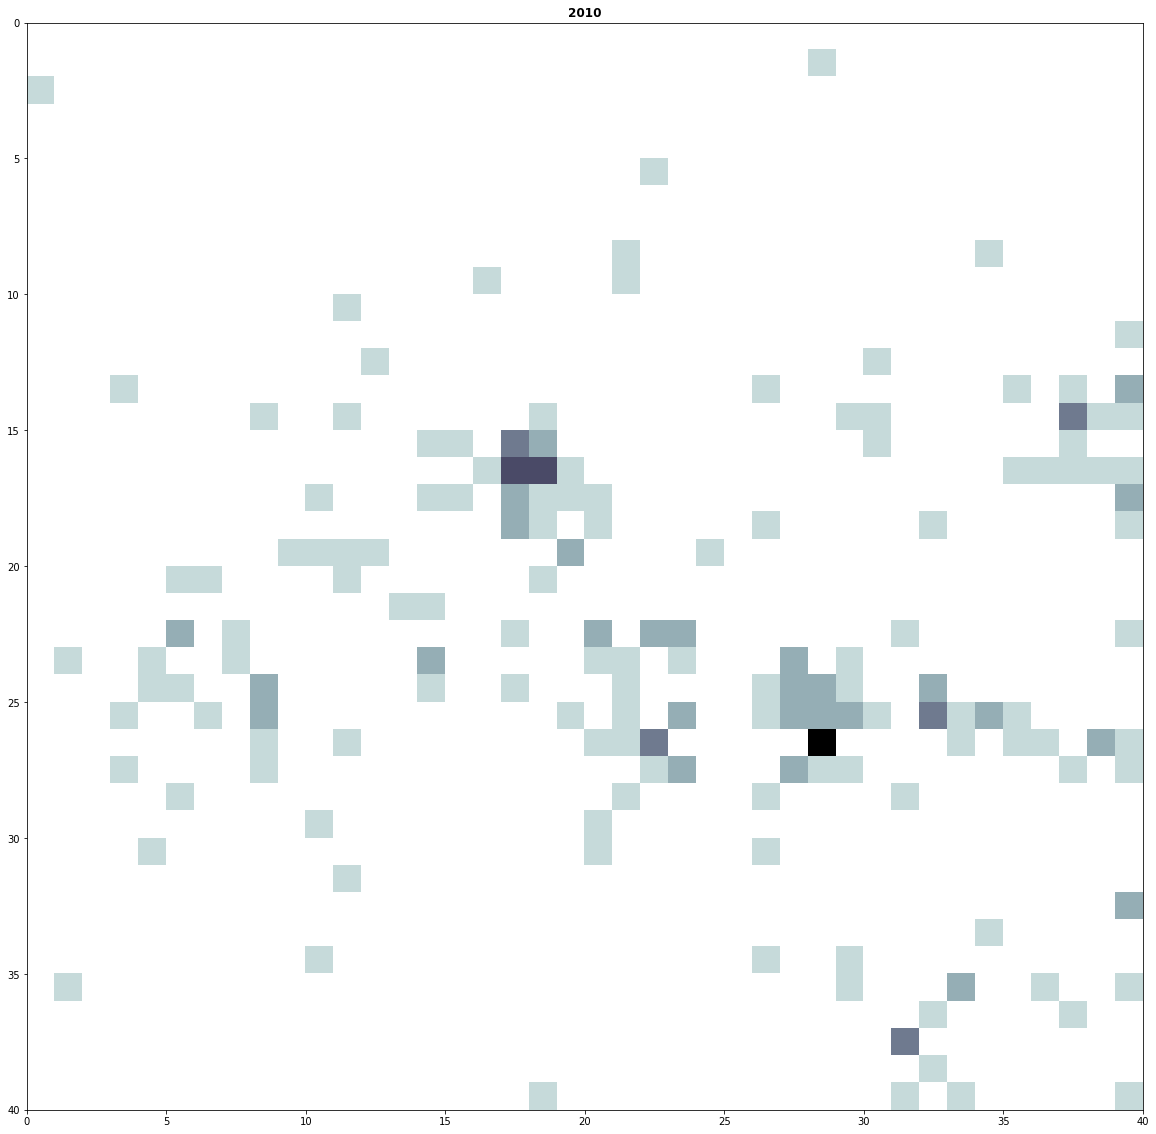

In [140]:
plt.figure(figsize=(20, 20))
base = np.zeros((40, 40), dtype='i')

feature = data_list[8].to_numpy()

start_time = datetime.now()
for cnt, xx in enumerate(feature):
    w = som.winner(xx)  # getting the winner   
    base[w[1]][w[0]] += 1 


heatmap = base
plt.pcolor(heatmap, cmap='bone_r')  # plotting the distance map as background
plt.title('2010', fontweight=800)

plt.axis([0, 40, 0, 40])
ax = plt.gca()
ax.invert_yaxis() #颠倒y轴方向


plt.show()